## Useful Links
https://stackoverflow.com/questions/41979481/mean-pixel-subtraction-for-numpy-array


In [73]:
import scipy.io as scio
import numpy as np    
import matplotlib.pyplot as plt
import sys
import os
import math
import pprint
import cv2
from scipy.misc import imsave
from helper import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
import skimage.restoration as sr
import numpy as np
import glob
# import h5py
import os
import scipy.io as scio
from skimage import exposure
from skimage.io import imsave, imread
from scipy.misc import imresize
from scipy.io import savemat
from scipy import ndimage, misc
import matplotlib.pyplot as plt
%matplotlib inline
import re

from helper import *

import os
cwd = os.getcwd()

In [75]:
# Setting the directories
import os
cwd = os.getcwd()
cwd = cwd + '/datasets-24-aug/OCTData/alldata/'
print(cwd)

/Users/sim/Desktop/Imperial/Project/PreTrained/relaynet_pytorch/datasets-24-aug/OCTData/alldata/


In [76]:
whole_raw_image_folder = cwd + 'whole_raw_image/'
print(whole_raw_image_folder)
def list_all_files(directory):
    from os import listdir
    from os.path import isfile, join
    all_labels_files = [f for f in listdir(directory) if isfile(join(directory, f))]
    all_labels_files.sort()
    return all_labels_files

/Users/sim/Desktop/Imperial/Project/PreTrained/relaynet_pytorch/datasets-24-aug/OCTData/alldata/whole_raw_image/


In [77]:
def atoi(text) : 
    return int(text) if text.isdigit() else text

In [78]:
def natural_keys(text) :
    return [atoi(c) for c in re.split('(\d+)', text)]

In [124]:
root_path = ""
filenames = []

# for root, dirnames, filenames in os.walk("/home/sim/notebooks/relaynet_pytorch/datasets/OCTData/alldata/whole_raw_image/Train"):
# for root, dirnames, filenames in os.walk("/Users/sim/Desktop/Imperial/Project/PreTrained/relaynet_pytorch/datasets-24-aug/OCTData/alldata/whole_raw_image"):
#     filenames.sort(key = natural_keys)
#     rootpath = root
for files in os.listdir(whole_raw_image_folder):
    for ext in ['.tif', '.jpg', '.JPG', '.png', '.npy', '.DS_Store']: 
        if files.endswith(ext):
            filenames.append(files)
filenames = sorted(filenames)
print(len(filenames))

66


In [125]:
filenames = filenames[1:] # making filenames without .DS_store

In [126]:
def get_info(filenames, root, ext):
    images = []
    for filename in filenames :
        filepath = os.path.join(root,filename)
        if ext == '.npy':
            image = np.load(filepath)
            h,w = image.shape
            
            if h != 512 or w != 64:
#                 print(h,w) 
                amount = 512 - h
                id_full = np.full((amount, 64), 0)
                image = np.concatenate((image, id_full))
#                 print(image.shape)
        elif ext == '.JPG' or ext == '.tif':
            image = ndimage.imread(filepath, mode = "L")
        images.append(image)
    return images

In [127]:
raw_images = get_info(filenames, whole_raw_image_folder, '.tif')

/Users/sim/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  app.launch_new_instance()


In [128]:
print (len(raw_images))

65


In [129]:
# print(filenames)

In [130]:
normalisedimages = []

In [ ]:
def normalise_images()
    

def denoiseImage(image):
    maxvalue = np.max(image)
    newimage = image*(255.0/maxvalue).astype(np.uint8)
    
    mean_filter_img = mean_filter(image)
    gaussian_filter_img = gaussian_filter(image)
    bilateral_filter_img = bilateral_filter(image)
    nlm_denoised = denoise_nl_means(newimage)
#     bm3d_denoised = denoise_nl_means(newimage)
    
    # Store denoised images in array
    mean_filter_images.append(mean_filter_img)
    gaussian_filter_images.append(gaussian_filter_img)
    bilateral_filter_images.append(bilateral_filter_img)
    nlm_denoised_images.append(nlm_denoised)

In [131]:
# def find_mean_image(list_of_images):
print(len(raw_images))
raw_images = np.asarray(raw_images)
print(raw_images.shape)

65
(65, 512, 600)


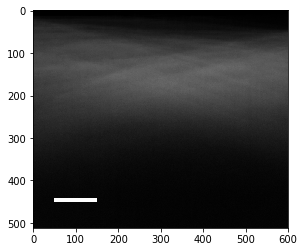

In [132]:
mean_image = np.mean(raw_images, axis=0)
plt.imshow(mean_image)

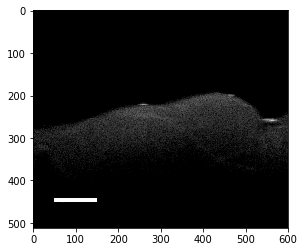

In [134]:
plt.imshow(raw_images[3])

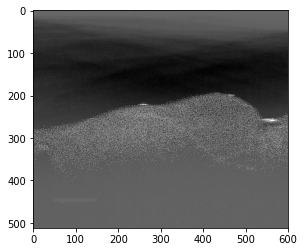

In [135]:
normalised_images = raw_images - mean_image
plt.imshow(normalised_images[3])

In [136]:
directory = '/Users/sim/Desktop/Imperial/Project/PreTrained/relaynet_pytorch/datasets-24-aug/OCTData/alldata/'
for item in range(len(normalised_images)):
    name = filenames[item]
    print(name)
    normalised_file = directory + 'normalised_raw_image/'+ name

con_H1_N01848_LA_1_272.tif
con_H1_N01848_LA_1_388.tif
con_H1_N01848_LV_1_194.tif
con_H1_N01848_LV_1_300.tif
con_H1_N01848_RVS_1_244.tif
con_H1_N01848_RVS_1_300.tif
con_H2_N02047_LA_1_241.tif
con_H2_N02047_LA_1_257.tif
con_H2_N02047_LVS_1_400.tif
con_H2_N02047_LVS_1_420.tif
con_H2_N02047_LV_1_194.tif
con_H2_N02047_LV_1_400.tif
con_H2_N02047_RA_1_380.tif
con_H2_N02047_RA_1_400.tif
con_H2_N02047_RVS_1_334.tif
con_H2_N02047_RVS_1_400.tif
con_H3_N02186_LA_1_400.tif
con_H3_N02186_LA_1_416.tif
con_H3_N02186_LVS_1_265.tif
con_H3_N02186_LVS_1_676.tif
con_H3_N02186_RA_1_380.tif
con_H3_N02186_RA_1_400.tif
con_H3_N02186_RVS_1_400.tif
con_H3_N02186_RVS_1_420.tif
con_H3_N02186_RV_1_270.tif
con_H3_N02186_RV_1_400.tif
con_H4_N03210_LVS_1_390.tif
con_H4_N03210_LVS_1_400.tif
con_H4_N03210_LV_1_400.tif
con_H4_N03210_RA_1_400.tif
con_H4_N03210_RA_1_440.tif
con_H4_N03210_RVS_1_400.tif
con_H4_N03210_RVS_1_420.tif
con_H4_N03210_RV_1_390.tif
con_H4_N03210_RV_1_400.tif
con_H5_N03290_LA_1_380.tif
con_H5_N03290_